In [1]:
import pandas as pd
import ast
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm

In [2]:
class CFG:
    dataset_dir="../input/ranzcr-clip-catheter-line-classification/"

In [3]:
annotations=pd.read_csv(f"{CFG.dataset_dir}train_annotations.csv")
annotatin_cvc=annotations[annotations["label"].str.contains("CVC")]
print(len(annotatin_cvc))

11629


In [25]:
annotatin_cvc

StudyInstanceUID             label  \
0      1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
1      1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
2      1.2.826.0.1.3680043.8.498.72921907356394389969...  CVC - Borderline   
3      1.2.826.0.1.3680043.8.498.11697104485452001927...      CVC - Normal   
5      1.2.826.0.1.3680043.8.498.87704688663091069148...      CVC - Normal   
...                                                  ...               ...   
17993  1.2.826.0.1.3680043.8.498.88885675487819792225...      CVC - Normal   
17995  1.2.826.0.1.3680043.8.498.18590666552942008211...      CVC - Normal   
17996  1.2.826.0.1.3680043.8.498.66774579023475418162...      CVC - Normal   
17997  1.2.826.0.1.3680043.8.498.18560506324214035535...      CVC - Normal   
17998  1.2.826.0.1.3680043.8.498.98119637144473510638...    CVC - Abnormal   

                                                    data  
0      [[1487, 1279], [1477, 1168], [1472, 1052], [14...  
1      [[1328, 7], [1347, 101], [1383, 193], [1400, 2...  
2      [[801, 1207], [812, 1112], [823, 1023], [842, ...  
3      [[1366, 961], [1411, 861], [1453, 751], [1508,...  
5      [[906, 604], [1103, 578], [1242, 607], [1459, ...  
...                                                  ...  
17993  [[1384, 1098], [1480, 899], [1554, 774], [1630...  
17995  [[1250, 1105], [1247, 1031], [1248, 970], [126...  
17996  [[1379, 1402], [1389, 1233], [1386, 1137], [13...  
17997  [[1302, 1543], [1308, 1488], [1317, 1355], [13...  
17998  [[1144, 1022], [1162, 934], [1179, 783], [1188...  

[11629 rows x 3 columns]

In [22]:
uid_count_list=[]
for uid in tqdm(annotatin_cvc["StudyInstanceUID"].unique()):
    uid_count_list.append((uid,len(annotatin_cvc[annotatin_cvc["StudyInstanceUID"]==uid])))

uid_count=pd.DataFrame(uid_count_list,columns=["StudyInstanceUID","count"])
display(uid_count["count"].value_counts())

100%|██████████| 8853/8853 [00:11<00:00, 771.39it/s]


1    6364
2    2218
3     255
4      16
Name: count, dtype: int64

In [24]:
train=pd.read_csv(f"{CFG.dataset_dir}train.csv")

In [33]:
def visualize_annotations(uid):
    rows=annotatin_cvc[annotatin_cvc["StudyInstanceUID"]==uid]
    annot_data_list=[]
    for idx,row in rows.iterrows():
        annot_data=ast.literal_eval(row["data"])
        annot_data=np.array(annot_data)
        annot_data_list.append(annot_data)

    fig,ax=plt.subplots(1,1,figsize=(8,8))
    image = cv2.imread(f"{CFG.dataset_dir}train/{uid}.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)

    color_list=["b","g","r","c","m","y","k","w"]
    for i,annot_data in enumerate(annot_data_list):
        ax.scatter(annot_data[0,0],annot_data[0,1],c=color_list[i])
        ax.scatter(annot_data[-1,0],annot_data[-1,1],c=color_list[i])
    ax.axis("off")

    dir_path="../input/cvc_annotated_multiple"
    os.makedirs(dir_path,exist_ok=True)
    fig.savefig(f"{dir_path}/{uid}.jpg")


def get_end_point(uid,annot_data):
    image = cv2.imread(f"{CFG.dataset_dir}train/{uid}.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    center=np.array([image.shape[0]/2,image.shape[1]/2])
    first_point=annot_data[0]
    last_point=annot_data[-1]
    if np.linalg.norm(first_point-center)>np.linalg.norm(last_point-center):
        end_point=last_point
    else:
        end_point=first_point
    return end_point

In [6]:
end_point_df=pd.DataFrame(columns=["StudyInstanceUID","x","y"])

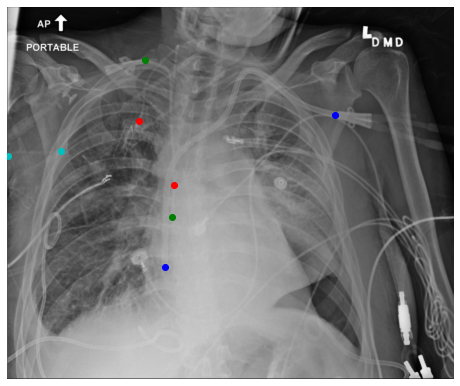

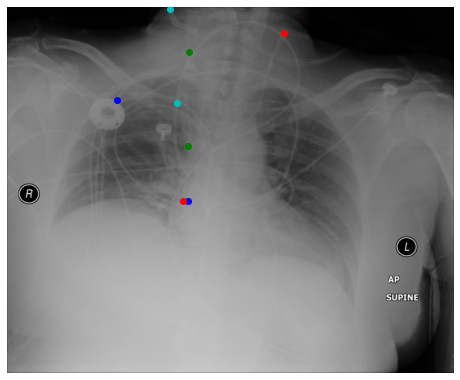

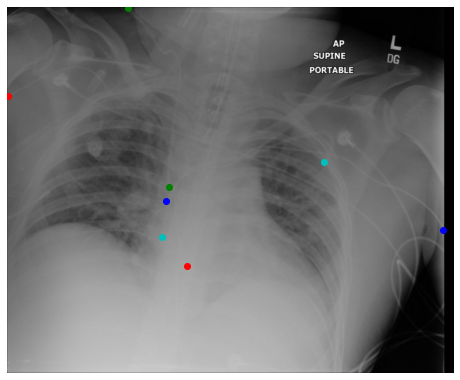

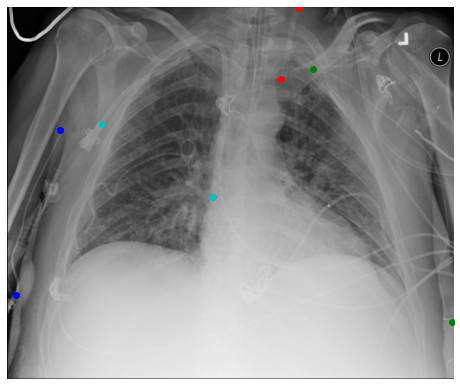

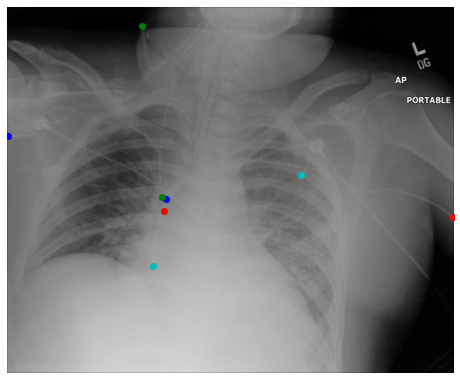

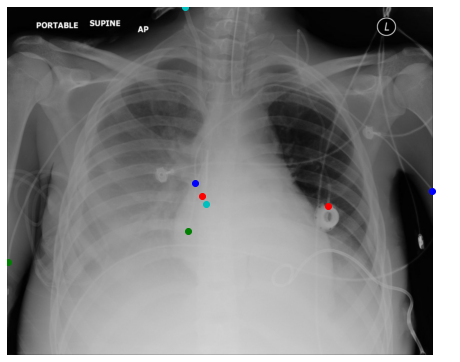

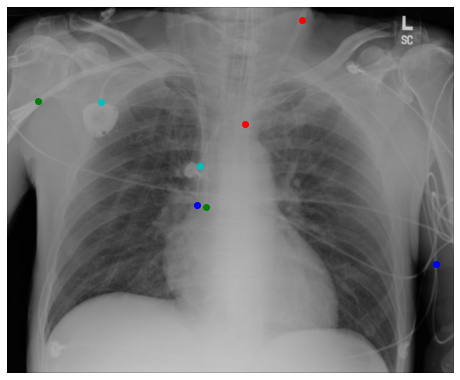

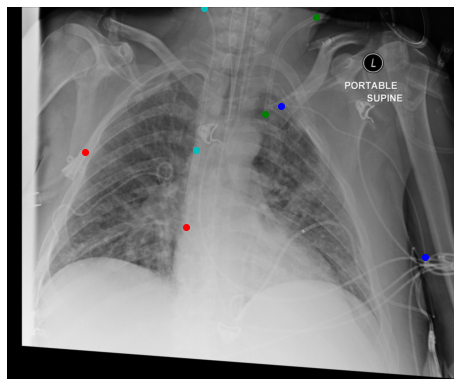

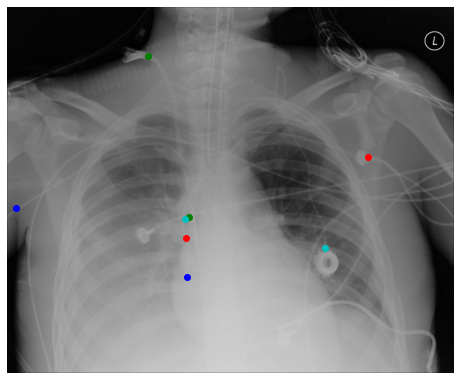

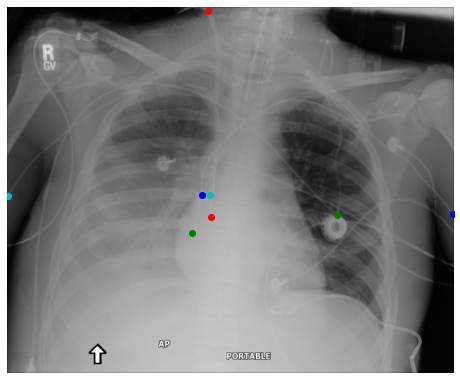

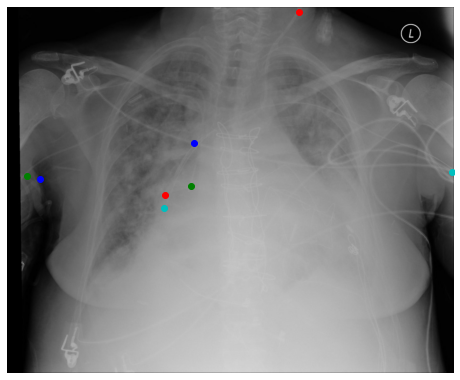

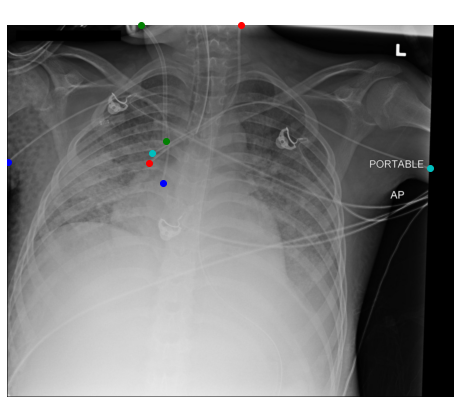

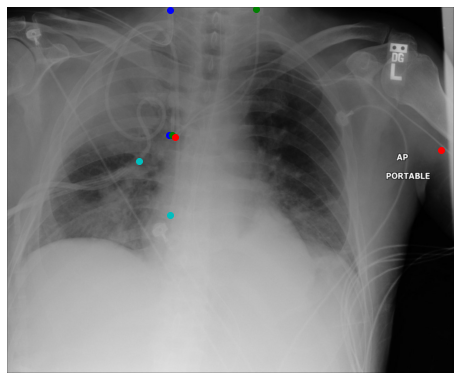

In [34]:
for idx,row in uid_count[uid_count["count"]==4].iterrows():
    uid=row["StudyInstanceUID"]
    visualize_annotations(uid)

In [8]:
end_point_df.to_csv("./cvc_end_points.csv",index=False)